In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.7 MB/s eta 0:00:00


**Tweeter Data Scrapper**

In [ ]:
import snscrape.modules.twitter as sntwitter
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string
from datetime import datetime

from matplotlib.ticker import StrMethodFormatter
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

In [ ]:
#limit to the number of tweets
limit = 5000

#store the tweets into a list
tweets_lst=[]

query="Women in Afghanistan"

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
   if len(tweets_lst) == limit:
       break
   else:
       tweets_lst.append([tweet.date,tweet.date.day,tweet.date.hour, tweet.id,tweet.content,tweet.hashtags,tweet.username,tweet.retweetCount,tweet.lang,tweet.likeCount,tweet.viewCount,tweet.user.followersCount,tweet.user.friendsCount,tweet.sourceLabel,tweet.retweetedTweet,tweet.user.location,tweet.coordinates,tweet.media,tweet.quoteCount,tweet.quotedTweet])



In [ ]:
df = pd.DataFrame(tweets_lst,columns=['date','day','hour', 'tweet_id','content','hashtags','user_name','retweetCount','lang','likeCount','viewCount','followersCount','friendsCount','sourceLabel','retweetedTweet','location','coordinates','media','quoteCount','quotedTweet'])
df.to_csv('WomenAfg-tweets.csv', index=False, encoding='utf-8')


In [ ]:
data = pd.read_csv('/content/sample_data/WomenAfg-tweets.csv')
data

,date,day,hour,tweet_id,content,hashtags,user_name,retweetCount,lang,likeCount,viewCount,followersCount,friendsCount,sourceLabel,retweetedTweet,location,coordinates,media,quoteCount,quotedTweet
0,2023-04-18 18:47:00+00:00,18,18,1648397736448761917,"@drninaansary Yeah, destroy someone else's hou...",NaN,THEONE97863547,0,en,0,8.0,3,1,Twitter Web App,NaN,NaN,NaN,NaN,0,NaN
1,2023-04-18 18:28:50+00:00,18,18,1648393161905938443,Health care workers see a bleak future for wom...,NaN,ZahraYusufi,3,en,6,323.0,11115,1269,Twitter Web App,NaN,"Toronto, Ontario",NaN,NaN,0,https://twitter.com/ZanTimes/status/1648017039...
2,2023-04-18 17:08:43+00:00,18,17,1648373001610575874,Even if the UN leaves there is still a need fo...,NaN,ShafiqaKhplwak,4,en,16,1785.0,240533,1598,Twitter for iPhone,NaN,kabul afghanistan,NaN,NaN,2,NaN
3,2023-04-18 15:50:48+00:00,18,15,1648353391280619524,@US4AfghanPeace These meetings should also inc...,NaN,Abdulra95272791,0,en,0,25.0,159,350,Twitter for Android,NaN,Afghanistan,NaN,NaN,0,NaN
4,2023-04-18 15:09:27+00:00,18,15,1648342988018311168,"My meeting with Mr. Thomas West, the US Specia...",['womeninafghanistan'],zakirahekmat,0,en,1,90.0,2835,1963,Twitter Web App,NaN,Turkey,NaN,NaN,0,https://twitter.com/US4AfghanPeace/status/1648...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2023-01-15 07:44:51+00:00,15,7,1614529029486383104,@TheDryhtscipe Well maybe they are speaking on...,NaN,Berathe,0,en,1,46.0,1458,1382,Twitter for Android,NaN,London,NaN,NaN,0,NaN
4996,2023-01-15 07:36:14+00:00,15,7,1614526858829365249,"Today, 14th January, we gathered at Westlake p...",['LetHerLearn'],FarishtaAfzaly,0,en,3,340.0,3543,1737,Twitter for iPhone,NaN,"Iowa, USA","Coordinates(longitude=-122.436232, latitude=47...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,0,NaN
4997,2023-01-15 06:58:33+00:00,15,6,1614517376783114240,"""Masoudeh Kohestani, a human rights activist o...",NaN,Plz_Support_PUP,3,en,3,119.0,365,1075,Twitter for Android,NaN,NaN,NaN,NaN,0,https://twitter.com/AmuTelevision/status/16142...
4998,2023-01-15 06:38:22+00:00,15,6,1614512298290479106,@GemsOfBollywood The fundamental problems of t...,NaN,_Deep_Think,0,en,4,309.0,119,92,Twitter Web App,NaN,India that is Bharat,NaN,NaN,0,NaN


In [ ]:
data['date'] = pd.to_datetime(df['date'])
data['Year'] = data['date'].dt.strftime('%Y')

print (min(df['date']))
print (max(df['date']))

2023-01-11 03:02:00+00:00
2023-03-29 14:31:02+00:00


  **Plots**

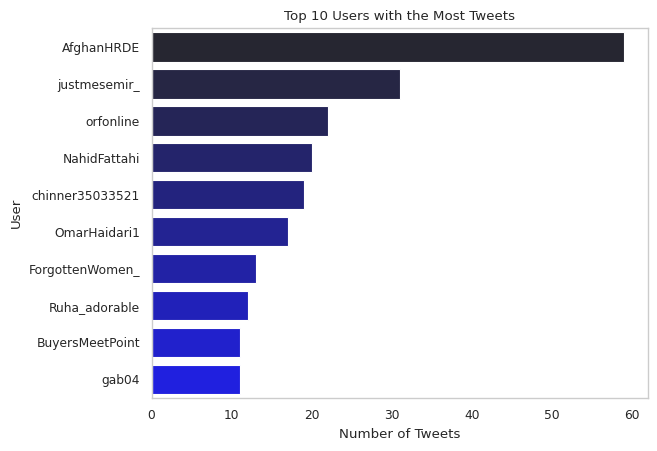

In [ ]:
# Count the number of tweets for each user
user_tweet_counts = data['user_name'].value_counts()

top_users = user_tweet_counts.head(10)

sns.set_style('whitegrid')
sns.barplot(x=top_users.values, y=top_users.index, palette='dark:b')

plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.title('Top 10 Users with the Most Tweets')
plt.grid(False)
plt.show()

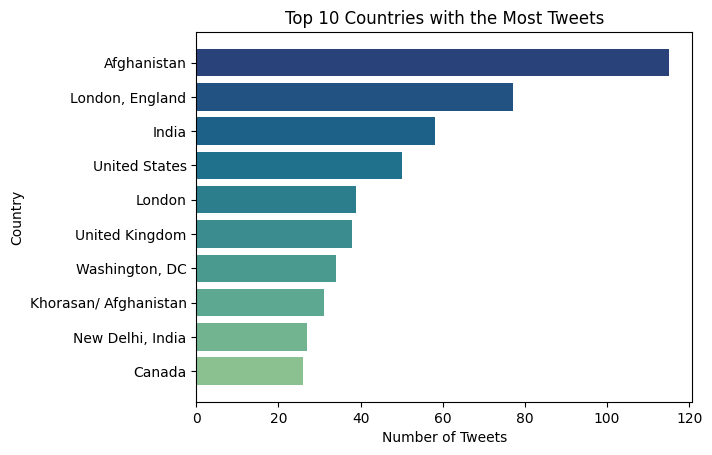

In [ ]:
# Group by location and count the number of tweets per country
tweet_counts = data.groupby('location')['tweet_id'].count()

sorted_tweet_counts = tweet_counts.sort_values(ascending=False)[:10][::-1]

color_palette = sns.color_palette("crest", len(sorted_tweet_counts))

plt.barh(sorted_tweet_counts.index, sorted_tweet_counts.values, color=color_palette)

plt.xlabel('Number of Tweets')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Tweets')
plt.grid(False)
plt.show()


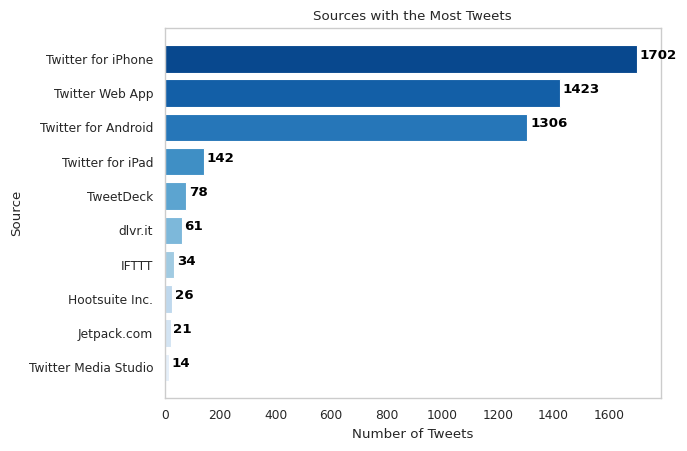

In [ ]:
# Group by source and count the number of tweets per source
source_counts = data.groupby('sourceLabel')['tweet_id'].count()

sorted_source_counts = source_counts.sort_values(ascending=False)[:10][::-1]


color_palette = sns.color_palette("Blues", len(sorted_source_counts))

plt.barh(sorted_source_counts.index, sorted_source_counts.values, color=color_palette)

plt.xlabel('Number of Tweets')
plt.ylabel('Source')
plt.title('Sources with the Most Tweets')

for i, v in enumerate(sorted_source_counts.values):
    plt.text(v + 10, i, str(v), color='black', fontweight='bold')

plt.gca().yaxis.grid(False)
plt.grid(False)
plt.show()


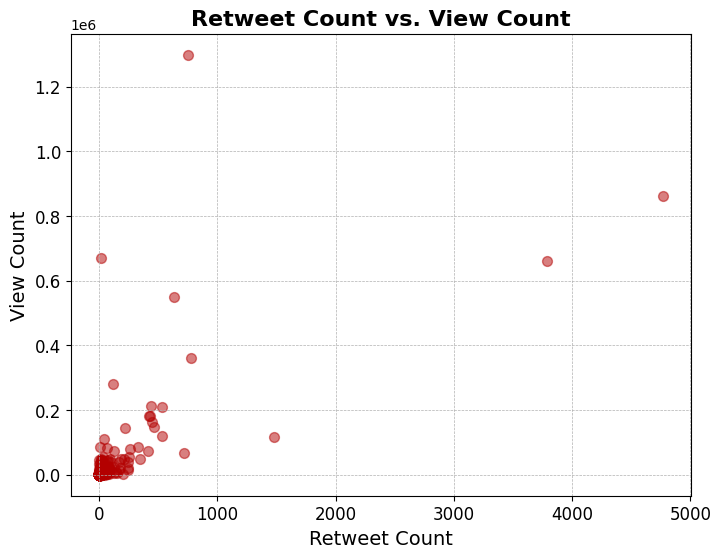

0.683972150974315

In [ ]:
# Scatter plot of retweet count vs. like count
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['retweetCount'], data['viewCount'], s=50, alpha=0.5, c='#b30000')

ax.set_xlabel('Retweet Count', fontsize=14)
ax.set_ylabel('View Count', fontsize=14)
ax.set_title('Retweet Count vs. View Count', fontsize=16, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

ax.grid(linestyle='--', linewidth=0.5)
plt.show()

data['viewCount'].corr(data['retweetCount'])


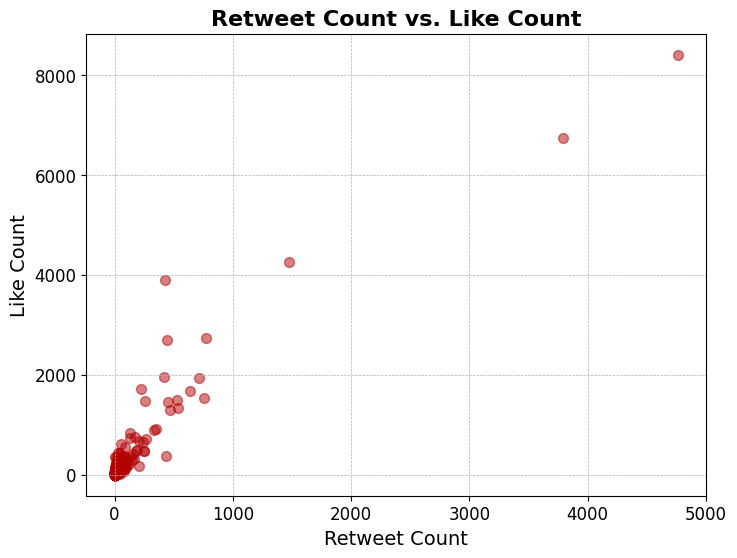

0.9326606440279605

In [ ]:
# Create a scatter plot of retweet count vs. like count
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['retweetCount'], data['likeCount'], s=50, alpha=0.5, c='#b30000')

ax.set_xlabel('Retweet Count', fontsize=14)
ax.set_ylabel('Like Count', fontsize=14)
ax.set_title('Retweet Count vs. Like Count', fontsize=16, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

ax.grid(linestyle='--', linewidth=0.5)
plt.show()

data['likeCount'].corr(data['retweetCount'])

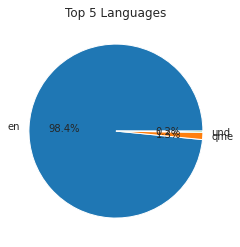

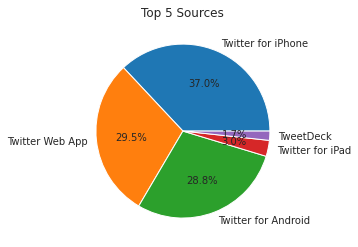

In [ ]:
# Top 5 languages
language_counts = df['lang'].value_counts().head(3)
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Languages')

# Top 5 sources
source_counts = df['sourceLabel'].value_counts().head(5)
plt.figure()
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Sources')

plt.show()


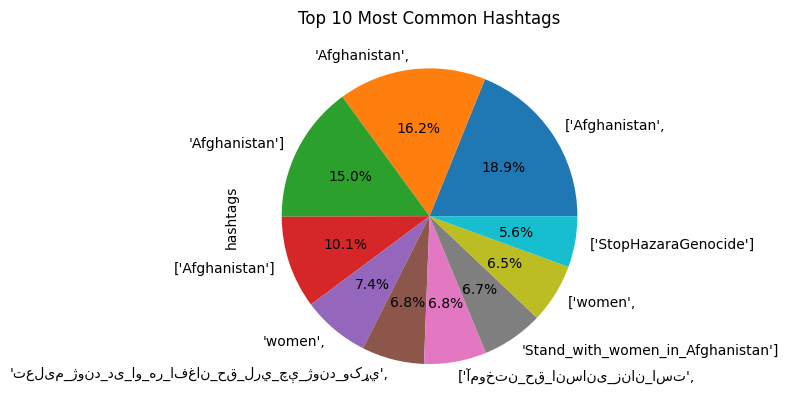

In [ ]:
data['hashtags'] = data['hashtags'].astype(str)

hashtags_count = data['hashtags'].str.split().explode().value_counts()

# Create a pie chart of the top 10 most common hashtags
top_10_hashtags = hashtags_count[1:11]
top_10_hashtags.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Most Common Hashtags')
plt.show()

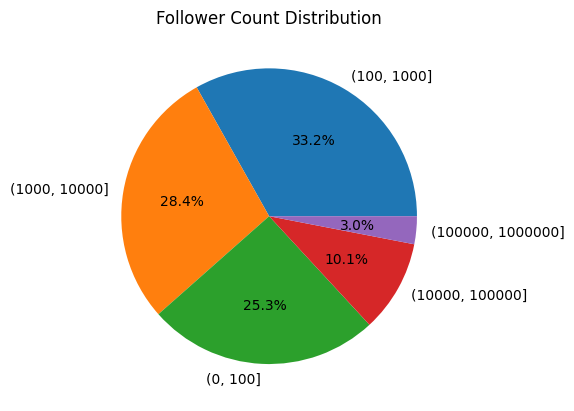

In [ ]:
followers = data['followersCount']

# Define the ranges for the follower count bins
bins = [0, 100, 1000, 10000, 100000, 1000000]

follower_bins = pd.cut(followers, bins=bins)
follower_counts = follower_bins.value_counts()

plt.pie(follower_counts, labels=follower_counts.index, autopct='%1.1f%%')
plt.title('Follower Count Distribution')

# Show the plot
plt.show()


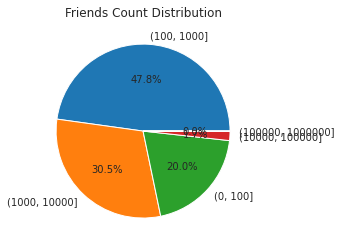

In [ ]:
friends = df['friendsCount']

# Define the ranges for the friends count bins
bins = [0, 100, 1000, 10000, 100000, 1000000]

friends_bins = pd.cut(friends, bins=bins)
friends_counts = friends_bins.value_counts()
plt.pie(friends_counts, labels=friends_counts.index, autopct='%1.1f%%')

plt.title('Friends Count Distribution')
plt.show()

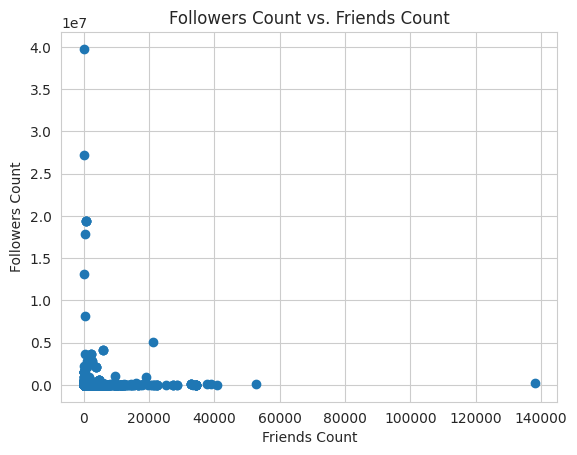

In [ ]:
# Scatter plotof followers count vs friends count columns
followers = data['followersCount']
friends = data['friendsCount']

plt.scatter(friends, followers)

plt.xlabel('Friends Count')
plt.ylabel('Followers Count')
plt.title('Followers Count vs. Friends Count')

plt.show()

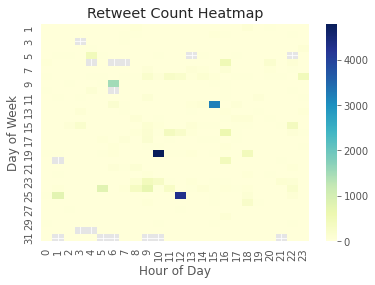

In [ ]:
# Create a pivot table to aggregate the retweet count by day and hour
heatmap_data = pd.pivot_table(df, values='retweetCount', index='day', columns='hour', aggfunc='sum')

sns.heatmap(heatmap_data, cmap='YlGnBu')

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Retweet Count Heatmap')
plt.show()


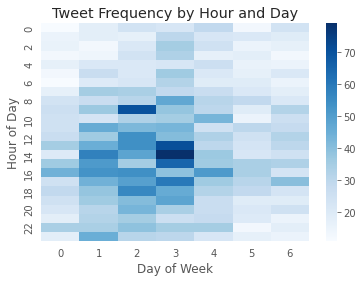

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour

df['day_of_week'] = df['date'].dt.dayofweek

# Pivot the dataframe to create a matrix of tweet counts by hour and day
heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='tweet_id', aggfunc='count')

sns.heatmap(heatmap_data, cmap='Blues')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Tweet Frequency by Hour and Day')
plt.show()


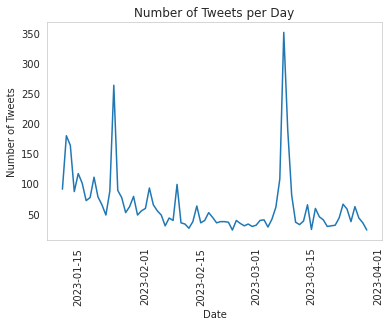

In [ ]:
df['date'] = pd.to_datetime(df['date'])

tweets_by_day = df.groupby(df['date'].dt.date).size().reset_index(name='count')

# Create a line chart of tweets by day
plt.plot(tweets_by_day['date'], tweets_by_day['count'])

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

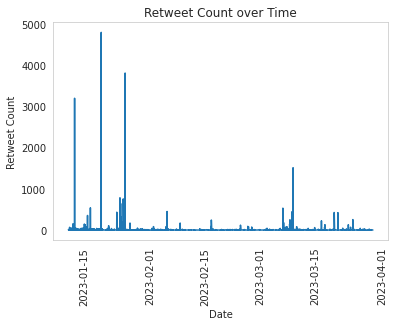

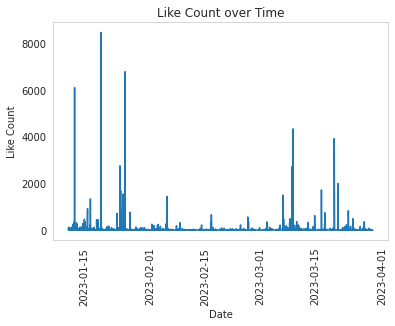

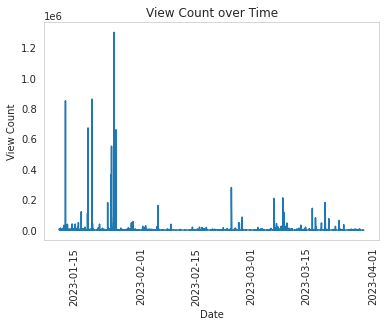

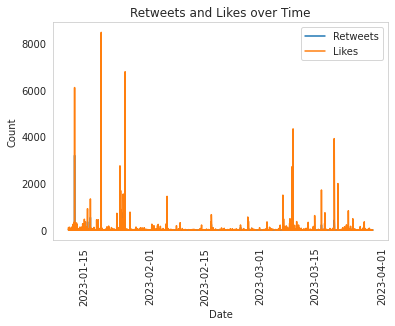

In [ ]:
df['date'] = pd.to_datetime(df['date'])

grouped = df.groupby('date').agg({'retweetCount': 'sum', 'likeCount': 'sum','viewCount': 'sum'})

# linear plot of retweet count over time
plt.plot(grouped.index, grouped['retweetCount'])
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.title('Retweet Count over Time')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# linear plot of like count over time
plt.plot(grouped.index, grouped['likeCount'])
plt.xlabel('Date')
plt.ylabel('Like Count')
plt.title('Like Count over Time')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# linear plot of view count over time
plt.plot(grouped.index, grouped['viewCount'])
plt.xlabel('Date')
plt.ylabel('View Count')
plt.title('View Count over Time')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

plt.plot(grouped.index, grouped['retweetCount'], label='Retweets')
plt.plot(grouped.index, grouped['likeCount'], label='Likes')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Retweets and Likes over Time')
plt.legend()
plt.xticks(rotation=90)
plt.grid(False)


plt.show()


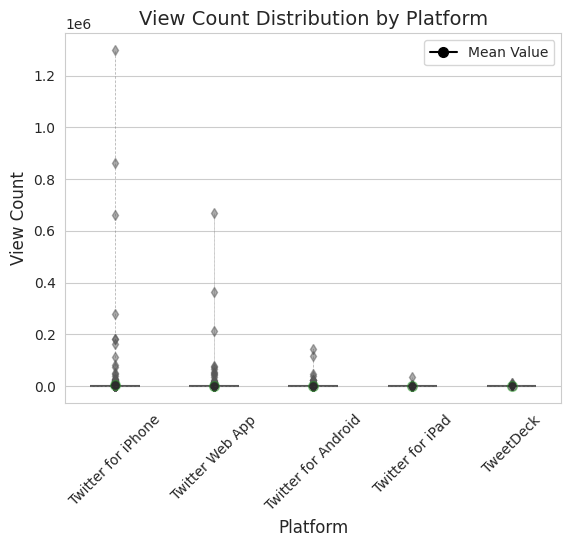

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_platforms = data['sourceLabel'].value_counts().nlargest(5).index.tolist()
df_top_platforms = data[data['sourceLabel'].isin(top_platforms)]
palette = sns.color_palette("Set2")

# Create the comparative boxplot using Seaborn
sns.set_style('whitegrid')
sns.boxplot(x='sourceLabel', y='viewCount', data=df_top_platforms, order=top_platforms, palette=palette, width=0.5, showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markersize': 7})

plt.xlabel('Platform', fontsize=12)
plt.ylabel('View Count', fontsize=12)
plt.title('View Count Distribution by Platform', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)

for line in plt.gca().lines:
    line.set_linestyle('-.')
    line.set_linewidth(0.5)
    line.set_color('gray')
    line.set_alpha(0.5)
    if line.get_linestyle() == '-.':
        line.set_dashes((3,3))

legend_label = 'Mean Value'
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='black', label=legend_label, markersize=7)], loc='upper right')

plt.show()


In [ ]:
import folium

# extract longitude and latitude values using regex
data['Longitude'] = data['coordinates'].str.extract('longitude=(-?\d+\.\d+)')
data['Latitude'] = data['coordinates'].str.extract('latitude=(-?\d+\.\d+)')

subset = data[['coordinates', 'Longitude', 'Latitude']]
print(subset)

data.dropna(subset=['coordinates'], inplace=True)
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

for index, row in data.iterrows():
    lat, lon = row['Latitude'], row['Longitude']
    popup_text = f"Location {index+1}"
    marker = folium.Marker([lat, lon], popup=popup_text)
    marker.add_to(map)

# Display the map
map


                                            coordinates    Longitude  \
0                                                   NaN          NaN   
1                                                   NaN          NaN   
2                                                   NaN          NaN   
3                                                   NaN          NaN   
4                                                   NaN          NaN   
...                                                 ...          ...   
4995                                                NaN          NaN   
4996  Coordinates(longitude=-122.436232, latitude=47...  -122.436232   
4997                                                NaN          NaN   
4998                                                NaN          NaN   
4999                                                NaN          NaN   

        Latitude  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
49

In [ ]:
import folium
from folium.plugins import HeatMap


data = data.dropna(subset=['Latitude', 'Longitude'])

map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

heat_data = [[row['Latitude'],row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map


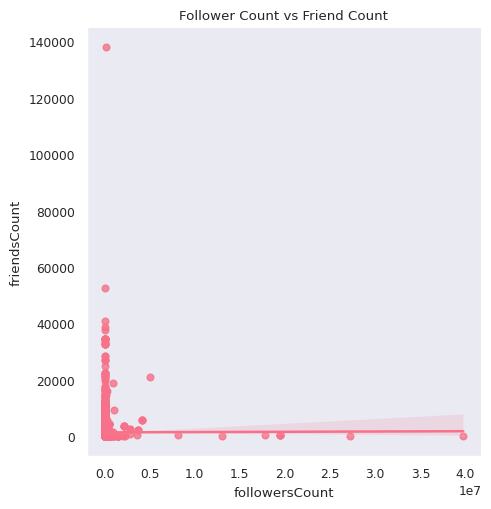

0.002643055553864916

In [ ]:
import seaborn as sns

sns.set_style("dark")
sns.set_context("paper")
sns.lmplot(x='followersCount', y='friendsCount', data=data)

plt.title("Follower Count vs Friend Count")
plt.show()

data['followersCount'].corr(data['friendsCount'])


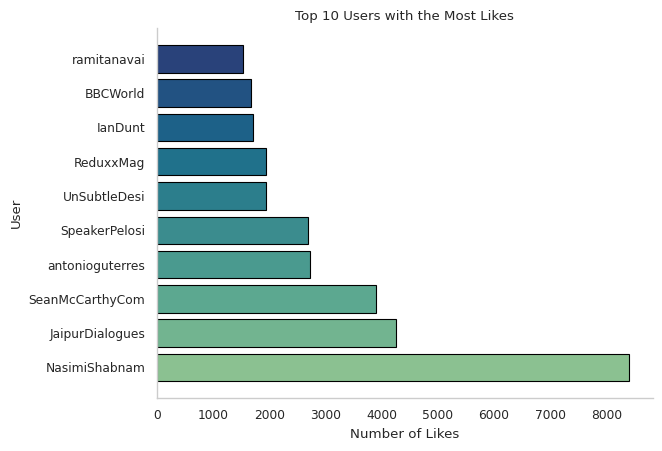

In [ ]:
# Get the top 10 users with the most likes
tweet_counts = data.groupby(['user_name'])['likeCount'] \
                             .max() \
                             .reset_index(name='Max_Likes') \
                             .sort_values(['Max_Likes'], ascending=False) \
                             .head(10)

color_palette = sns.color_palette("crest", len(tweet_counts))
plt.barh(tweet_counts['user_name'], tweet_counts['Max_Likes'], color=color_palette, edgecolor='black')

plt.xlabel('Number of Likes')
plt.ylabel('User')
plt.title('Top 10 Users with the Most Likes')
plt.grid(False)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()
